## Synthetic construct 2 (cc2 run GridIon from EpiNano paper) iForest prediction analysis

    15/03/2022

Data have been produced by *CtoUclassifier_pipe_currents_extraction_step* pipeline.

In [1]:
# import basic modules
import os, sys

# add parent folder of the C_to_U_classifier_plus_min package to path in order to be loaded into the current session
sys.path.append("/lustrehome/afonzino")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from C_to_U_classifier_plus_min import utils
import pysam
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix

Matplotlib is building the font cache; this may take a moment.


In [2]:
# define input paths for iForest prediction on basecalling features
dfCTaggr_filepath = "/lustre/bio_running/C_to_U_editing_minimap2_spliced/cc2.model_iForestcc1_pretrained_results/df_CT_predicted_aggregated.tsv"
ref_filepath = "/lustre/bio_running/curlcakes_runs/refs/cc.fasta"

/lustrehome/afonzino/C_to_U_classifier_plus_min/utils.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tfreq_native"] = df["Tfreq_native"] + offset
/lustrehome/afonzino/C_to_U_classifier_plus_min/utils.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tfreq_corrected"] = df["Tfreq_corrected"] + offset


[2022-03-24 16:27:43.089633] Retrieving Contigs and lengths...
[2022-03-24 16:27:43.090157] Merging dataframes for region chr1...
[2022-03-24 16:27:43.101547] Merging finished....start plotting...


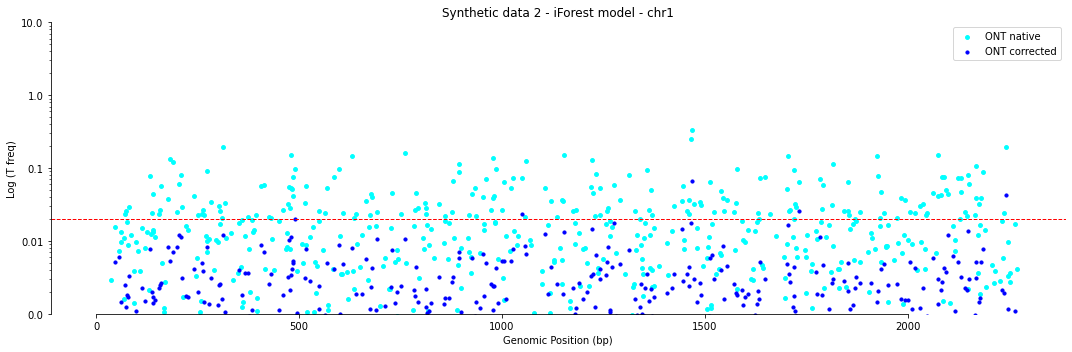

[2022-03-24 16:27:43.901901] Merging dataframes for region chr2...
[2022-03-24 16:27:43.909115] Merging finished....start plotting...


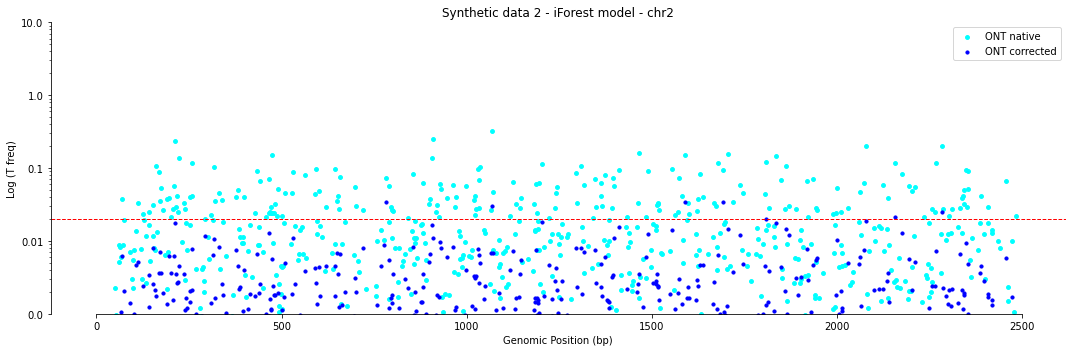

[2022-03-24 16:27:44.387708] Merging dataframes for region chr3...
[2022-03-24 16:27:44.392647] Merging finished....start plotting...


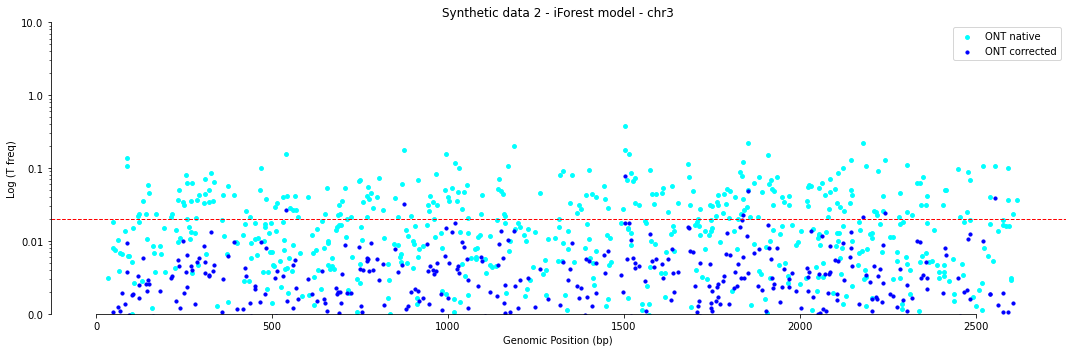

[2022-03-24 16:27:44.860258] Merging dataframes for region chr4...
[2022-03-24 16:27:44.868182] Merging finished....start plotting...


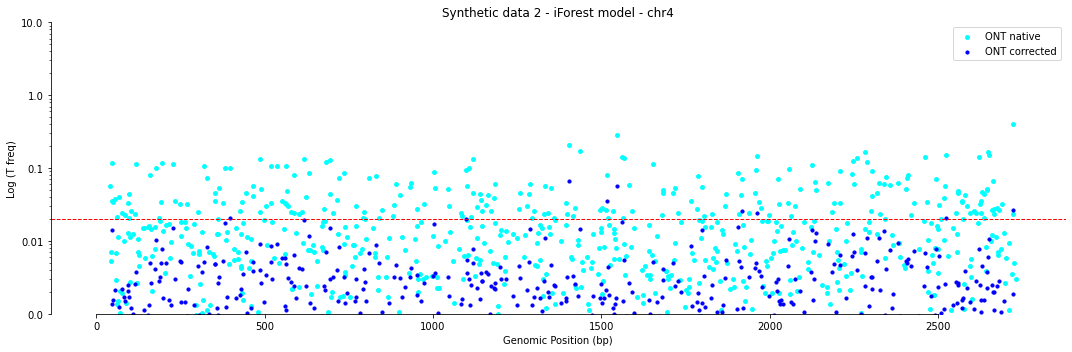

In [3]:
utils.plot_frequencies(reference_filepath=ref_filepath, 
                       df_aggregated_filepath=dfCTaggr_filepath, 
                       title="Synthetic data 2 - iForest model",
                       save_folderpath="/lustre/bio_running/C_to_U_editing_minimap2_spliced/src_jupyter_notebooks_multi_thr/cc2",
                       log=True,
                       offset=0,
                       native_color="cyan",
                       corrected_color="blue",
                       native_size=15,
                       corrected_size=10,
                       strand="+")

In [4]:
dfCTaggr = pd.read_table(dfCTaggr_filepath)
# drop unwanted (-) strand sites
dfCTaggr = dfCTaggr.query("strand == '+'")
dfCTaggr

,region,position,strand,T_native,T_corrected,depth_stranded,Tfreq_native,Tfreq_corrected
0,chr1,37,+,4,0,1377,0.002905,0.000000
1,chr1,47,+,181,59,11601,0.015602,0.005086
2,chr1,55,+,86,70,11742,0.007324,0.005962
3,chr1,61,+,110,5,11306,0.009729,0.000442
4,chr1,62,+,156,17,11792,0.013229,0.001442
...,...,...,...,...,...,...,...,...
2793,chr4,2719,+,488,72,138447,0.003525,0.000520
2794,chr4,2722,+,56369,3666,137772,0.409147,0.026609
2795,chr4,2723,+,3255,261,138874,0.023439,0.001879
2797,chr4,2727,+,698,41,139638,0.004999,0.000294


In [5]:
dfCTaggr.Tfreq_native.describe()

count    2495.000000
mean        0.023750
std         0.034731
min         0.000090
25%         0.003872
50%         0.011446
75%         0.028611
max         0.409147
Name: Tfreq_native, dtype: float64

In [6]:
dfCTaggr.Tfreq_corrected.describe()

count    2495.000000
mean        0.002467
std         0.004764
min         0.000000
25%         0.000296
50%         0.000964
75%         0.002681
max         0.078705
Name: Tfreq_corrected, dtype: float64

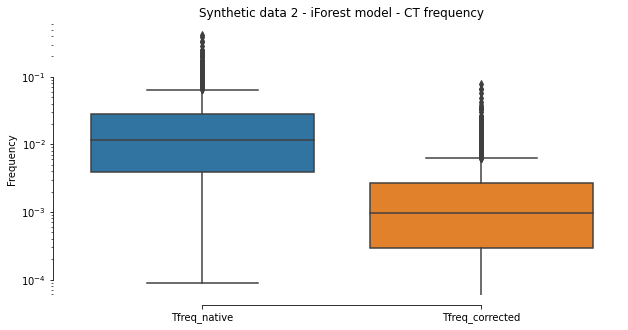

In [7]:
plt.figure(figsize=(10,5))
sn.boxplot(data=dfCTaggr[["Tfreq_native", "Tfreq_corrected"]])
plt.yscale("log")
plt.title("Synthetic data 2 - iForest model - CT frequency")
plt.ylabel("Frequency")
sn.despine(offset=10, trim=True)
plt.savefig("/lustre/bio_running/C_to_U_editing_minimap2_spliced/src_jupyter_notebooks_multi_thr/cc2/cc2.iForest.aggregated.boxplot.tiff")
plt.show()

### Let's produce a classification report and a confusion matrix

In [8]:
# retrieve position on curlcake reference with C base
# focus only on (+) strand since it is the only one important in this experimental set-up
ref = pysam.FastaFile(ref_filepath)

putative_ed_pos = []
for contig in ref.references:
    chrom = ref.fetch(contig)
    counter = 0
    for pos in chrom:
        counter += 1
        if pos == "C":
            putative_ed_pos.append([contig, counter, "+"])
C_pos_curlcake = pd.DataFrame(putative_ed_pos, columns=["region", "position", "strand"])

C_pos_curlcake

,region,position,strand
0,chr1,3,+
1,chr1,14,+
2,chr1,17,+
3,chr1,19,+
4,chr1,21,+
...,...,...,...
2516,chr4,2719,+
2517,chr4,2722,+
2518,chr4,2723,+
2519,chr4,2727,+


In [9]:
# merge resulting C position reference dataframe with genome space
cc2_genome_space = C_pos_curlcake.merge(dfCTaggr, how="left", left_on=["region", "position", "strand"], right_on=["region", "position", "strand"]).fillna(0).copy()
cc2_genome_space

,region,position,strand,T_native,T_corrected,depth_stranded,Tfreq_native,Tfreq_corrected
0,chr1,3,+,0.0,0.0,0.0,0.000000,0.000000
1,chr1,14,+,0.0,0.0,0.0,0.000000,0.000000
2,chr1,17,+,0.0,0.0,0.0,0.000000,0.000000
3,chr1,19,+,0.0,0.0,0.0,0.000000,0.000000
4,chr1,21,+,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2516,chr4,2719,+,488.0,72.0,138447.0,0.003525,0.000520
2517,chr4,2722,+,56369.0,3666.0,137772.0,0.409147,0.026609
2518,chr4,2723,+,3255.0,261.0,138874.0,0.023439,0.001879
2519,chr4,2727,+,698.0,41.0,139638.0,0.004999,0.000294


In [10]:
# retrieve reference 5mer for each site and then predict editing (cc1 thresholds)
cc2_genome_space = utils.predict_editing_custom_thrs(cc2_genome_space, 
                                               custom_thrs_filepath="/lustre/bio_running/C_to_U_editing_minimap2_spliced/src_jupyter_notebooks_multi_thr/cc1/cc1.iforest.freq_thresholds.tsv",
                                               ref_filepath="/lustre/bio_running/curlcakes_runs/refs/cc.fasta",
                                               min_thr=0.00) # min thr 99% percentile of cc1 error
cc2_genome_space

100%|██████████| 2521/2521 [00:00<00:00, 11269.89it/s]


,region,position,strand,T_native,T_corrected,depth_stranded,Tfreq_native,Tfreq_corrected,5mer,y_hat
0,chr1,3,+,0.0,0.0,0.0,0.000000,0.000000,ATCAT,0
1,chr1,14,+,0.0,0.0,0.0,0.000000,0.000000,TACGA,0
2,chr1,17,+,0.0,0.0,0.0,0.000000,0.000000,GACTC,0
3,chr1,19,+,0.0,0.0,0.0,0.000000,0.000000,CTCAC,0
4,chr1,21,+,0.0,0.0,0.0,0.000000,0.000000,CACTA,0
...,...,...,...,...,...,...,...,...,...,...
2516,chr4,2719,+,488.0,72.0,138447.0,0.003525,0.000520,GACAA,0
2517,chr4,2722,+,56369.0,3666.0,137772.0,0.409147,0.026609,AACCG,0
2518,chr4,2723,+,3255.0,261.0,138874.0,0.023439,0.001879,ACCGA,0
2519,chr4,2727,+,698.0,41.0,139638.0,0.004999,0.000294,AACAA,0


In [11]:
# drop position with a depth lower than threshold
cc2_genome_space = cc2_genome_space.query("depth_stranded > 49").copy()

In [12]:
freq_threshold = 0.02 # 99th percentile of cc1 sample

# create y vectors of expected, revealed without and with iForest correction above a minumum frequency threshold 
cc2_genome_space["y_expected"] = [0 for i in range(cc2_genome_space.shape[0])]
cc2_genome_space["y_noCorrection"] = [1 if (i>freq_threshold) else 0 for i in cc2_genome_space.loc[:,"Tfreq_native"]]
cc2_genome_space["y_iForestCorrection"] = cc2_genome_space["y_hat"]
# drop y
cc2_genome_space.drop("y_hat", axis=1, inplace=True)
cc2_genome_space

,region,position,strand,T_native,T_corrected,depth_stranded,Tfreq_native,Tfreq_corrected,5mer,y_expected,y_noCorrection,y_iForestCorrection
7,chr1,37,+,4.0,0.0,1377.0,0.002905,0.000000,GGCTG,0,0,0
8,chr1,47,+,181.0,59.0,11601.0,0.015602,0.005086,GTCGA,0,0,0
9,chr1,55,+,86.0,70.0,11742.0,0.007324,0.005962,ATCAA,0,0,0
10,chr1,61,+,110.0,5.0,11306.0,0.009729,0.000442,AACCT,0,0,0
11,chr1,62,+,156.0,17.0,11792.0,0.013229,0.001442,ACCTT,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2516,chr4,2719,+,488.0,72.0,138447.0,0.003525,0.000520,GACAA,0,0,0
2517,chr4,2722,+,56369.0,3666.0,137772.0,0.409147,0.026609,AACCG,0,1,0
2518,chr4,2723,+,3255.0,261.0,138874.0,0.023439,0.001879,ACCGA,0,1,0
2519,chr4,2727,+,698.0,41.0,139638.0,0.004999,0.000294,AACAA,0,0,0


In [13]:
print("0 no edited, 1 edited")
print("Expected classes:\n", cc2_genome_space["y_expected"].value_counts())
print("\nDetected classes without correction:\n", cc2_genome_space["y_noCorrection"].value_counts())
print("\nDetected classes with iForest correction:\n", cc2_genome_space["y_iForestCorrection"].value_counts())

0 no edited, 1 edited
Expected classes:
 0    2495
Name: y_expected, dtype: int64

Detected classes without correction:
 0    1613
1     882
Name: y_noCorrection, dtype: int64

Detected classes with iForest correction:
 0    2376
1     119
Name: y_iForestCorrection, dtype: int64


In [14]:
# produce classification report
# calculate metrics on aggregated data
print("1 editing, 0 no-editing\n")

print("\nClassification Report without (native nanopore) correction:\n", classification_report(cc2_genome_space["y_expected"], cc2_genome_space["y_noCorrection"]))
print("\nClassification Report with iForest correction:\n", classification_report(cc2_genome_space["y_expected"], cc2_genome_space["y_iForestCorrection"]))

/lustrehome/afonzino/.conda/envs/nanocompore/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


1 editing, 0 no-editing


Classification Report without (native nanopore) correction:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79      2495
           1       0.00      0.00      0.00         0

    accuracy                           0.65      2495
   macro avg       0.50      0.32      0.39      2495
weighted avg       1.00      0.65      0.79      2495


Classification Report with iForest correction:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      2495
           1       0.00      0.00      0.00         0

    accuracy                           0.95      2495
   macro avg       0.50      0.48      0.49      2495
weighted avg       1.00      0.95      0.98      2495



## 5mer level analys of residual errors

In [15]:
ref = pysam.FastaFile(ref_filepath)
total_Cs = 0 
for r in ref.references:
    Cs = ref.fetch(r).count("C")
    total_Cs += Cs
    print(r, Cs)
print("Total Cs:", total_Cs)
ref.close()

chr1 549
chr2 608
chr3 645
chr4 719
Total Cs: 2521


In [16]:
dfCTaggr

,region,position,strand,T_native,T_corrected,depth_stranded,Tfreq_native,Tfreq_corrected
0,chr1,37,+,4,0,1377,0.002905,0.000000
1,chr1,47,+,181,59,11601,0.015602,0.005086
2,chr1,55,+,86,70,11742,0.007324,0.005962
3,chr1,61,+,110,5,11306,0.009729,0.000442
4,chr1,62,+,156,17,11792,0.013229,0.001442
...,...,...,...,...,...,...,...,...
2793,chr4,2719,+,488,72,138447,0.003525,0.000520
2794,chr4,2722,+,56369,3666,137772,0.409147,0.026609
2795,chr4,2723,+,3255,261,138874,0.023439,0.001879
2797,chr4,2727,+,698,41,139638,0.004999,0.000294


In [17]:
with tqdm(total=dfCTaggr.shape[0]) as pbar:
    refs = []
    ref = pysam.FastaFile(ref_filepath)
    for s in dfCTaggr.itertuples():
        site = f"{s.region}:{s.position}{s.strand}"
        pos1based=s.position
        pos0based=pos1based-1
        start=pos0based-2
        stop=pos0based+3
        strand = s.strand
        reference = ref.fetch(s.region, start, stop)
        if strand == "+":
            refs.append(reference)
        elif strand == "-":
            refs.append(utils.get_rev_compl(reference))
        else:
            # stange strand. append unkwnown value as "."
            refs.append(".")
        pbar.update(1)
    ref.close()
dfCTaggr["5mer"] = refs

100%|██████████| 2495/2495 [00:00<00:00, 106471.75it/s]


In [18]:
dfCTaggr[dfCTaggr.Tfreq_corrected > 0.02].groupby("5mer").Tfreq_corrected.describe().sort_values("max")

,count,mean,std,min,25%,50%,75%,max
5mer,,,,,,,,
TTCGG,1.0,0.020234,NaN,0.020234,0.020234,0.020234,0.020234,0.020234
GCCGT,1.0,0.020503,NaN,0.020503,0.020503,0.020503,0.020503,0.020503
CTCGG,1.0,0.021501,NaN,0.021501,0.021501,0.021501,0.021501,0.021501
TTCTA,1.0,0.021652,NaN,0.021652,0.021652,0.021652,0.021652,0.021652
TGCCG,1.0,0.022947,NaN,0.022947,0.022947,0.022947,0.022947,0.022947
TACTG,1.0,0.023134,NaN,0.023134,0.023134,0.023134,0.023134,0.023134
TACTA,1.0,0.024485,NaN,0.024485,0.024485,0.024485,0.024485,0.024485
TTCGC,1.0,0.025304,NaN,0.025304,0.025304,0.025304,0.025304,0.025304
ATCGG,2.0,0.023056,0.003416,0.020641,0.021849,0.023056,0.024264,0.025472


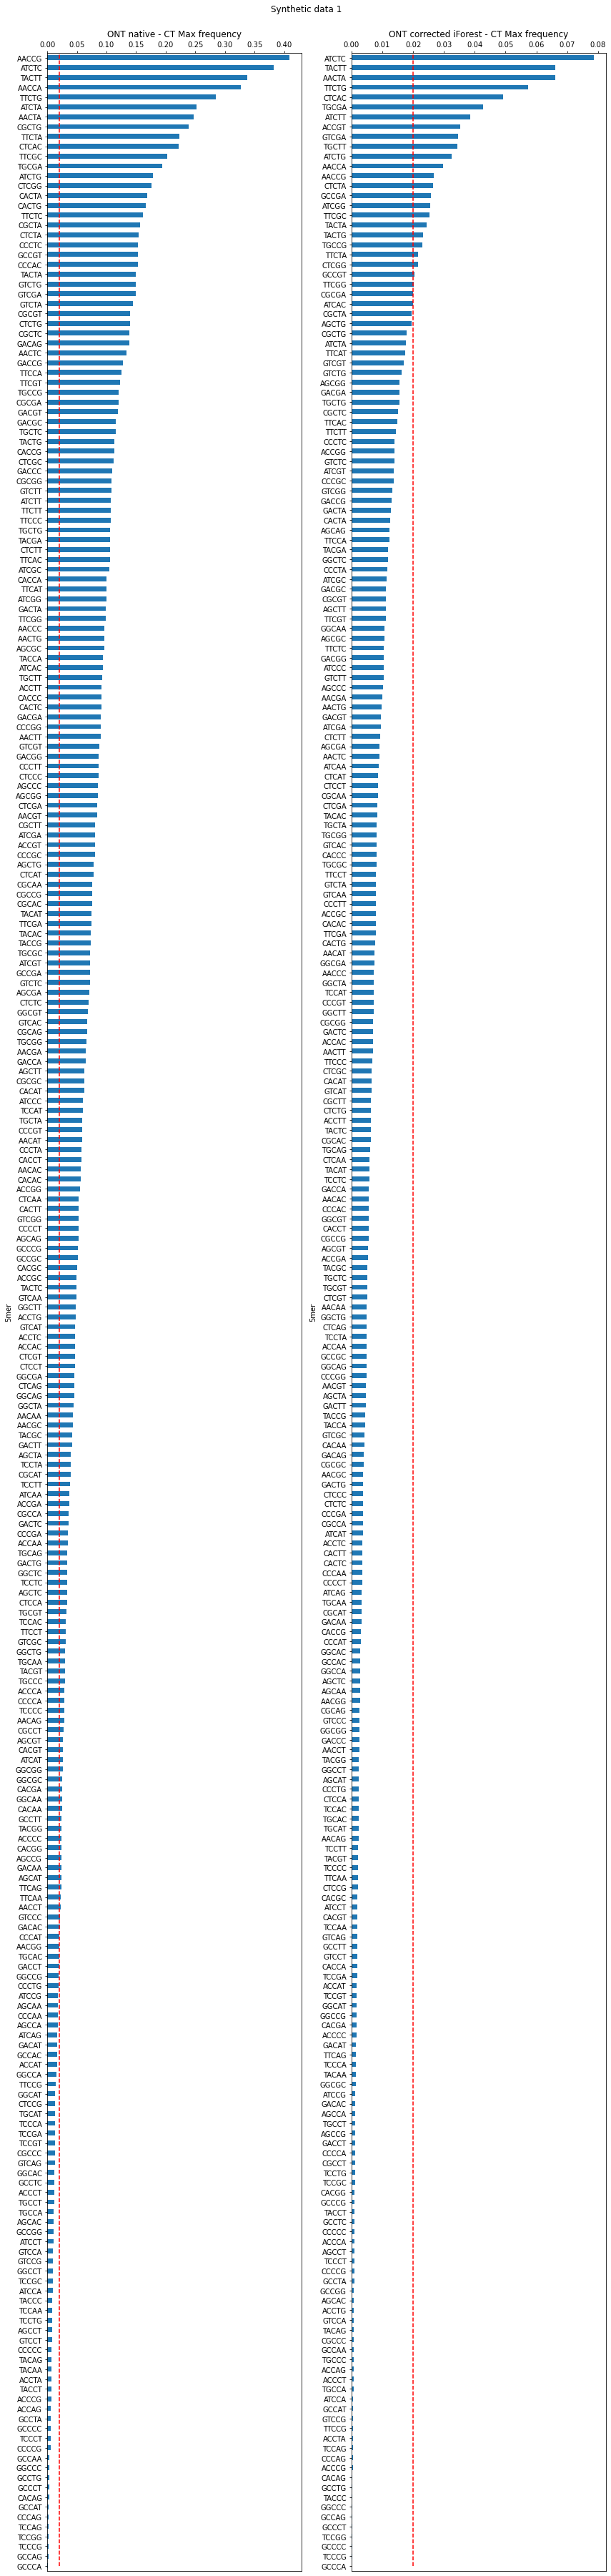

In [19]:
f, axes = plt.subplots(1,2, figsize=(12,50))

dfCTaggr.groupby("5mer").Tfreq_native.describe().sort_values("max")["max"].plot.barh(ax=axes[0])
axes[0].vlines(0.02, 0, 256, "r", "--")
axes[0].set_title("ONT native - CT Max frequency")
axes[0].xaxis.tick_top()

dfCTaggr.groupby("5mer").Tfreq_corrected.describe().sort_values("max")["max"].plot.barh(ax=axes[1])
axes[1].vlines(0.02, 0, 256, "r", "--")
axes[1].set_title("ONT corrected iForest - CT Max frequency")
axes[1].xaxis.tick_top()

plt.suptitle("Synthetic data 2", y= 1.00)
plt.tight_layout()
plt.savefig("Max CT freq error before and after iForest correction.tiff", dpi=100)
plt.show()

In [20]:
# save to disk table with all the max frequency to be used as custom threshold for each 5mer
dfCTaggr.groupby("5mer").Tfreq_corrected.describe().sort_values("max")["max"].to_csv("cc2.iforest.freq_thresholds.tsv", sep="\t")

In [21]:
dfCTaggr["reduction"] = ((dfCTaggr.T_corrected-dfCTaggr.T_native)/dfCTaggr.T_native) * 100
dfCTaggr

,region,position,strand,T_native,T_corrected,depth_stranded,Tfreq_native,Tfreq_corrected,5mer,reduction
0,chr1,37,+,4,0,1377,0.002905,0.000000,GGCTG,-100.000000
1,chr1,47,+,181,59,11601,0.015602,0.005086,GTCGA,-67.403315
2,chr1,55,+,86,70,11742,0.007324,0.005962,ATCAA,-18.604651
3,chr1,61,+,110,5,11306,0.009729,0.000442,AACCT,-95.454545
4,chr1,62,+,156,17,11792,0.013229,0.001442,ACCTT,-89.102564
...,...,...,...,...,...,...,...,...,...,...
2793,chr4,2719,+,488,72,138447,0.003525,0.000520,GACAA,-85.245902
2794,chr4,2722,+,56369,3666,137772,0.409147,0.026609,AACCG,-93.496425
2795,chr4,2723,+,3255,261,138874,0.023439,0.001879,ACCGA,-91.981567
2797,chr4,2727,+,698,41,139638,0.004999,0.000294,AACAA,-94.126074


In [22]:
dfCTaggr.groupby("5mer").describe().reduction.sort_values("max")

,count,mean,std,min,25%,50%,75%,max
5mer,,,,,,,,
CACGA,4.0,-95.247975,1.422720,-96.943231,-96.077913,-95.184185,-94.354247,-93.680297
ACCTA,7.0,-95.460414,1.879557,-99.047619,-95.907950,-95.783133,-93.994536,-93.587174
CTCTC,9.0,-96.406758,1.955904,-99.527346,-98.142415,-95.684803,-95.279775,-93.477422
TTCTC,10.0,-96.761335,1.670420,-98.992951,-97.932845,-97.002450,-95.879963,-93.380358
CACTT,8.0,-94.136563,1.266829,-96.306069,-94.907932,-93.835770,-93.148840,-92.778101
...,...,...,...,...,...,...,...,...
ATCTT,8.0,-78.230351,14.516730,-92.879747,-91.826105,-80.240786,-68.740864,-53.652058
TCCAT,11.0,-83.303689,13.149327,-93.112948,-90.280636,-87.341772,-84.529915,-48.750000
AACTC,8.0,-87.751777,17.534348,-97.608768,-94.559144,-94.144178,-92.142547,-44.858300
